# PROJECT : SALES DATA ANALYSIS

AIM : We have to Analyze the Sales Data by using Python Libraries like Numpy, Pandas, Matplotlib and Seborn with their Mathematical-Statistical functions and interactive visualizations to better understanding the Trends and Patterns.  

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Loading the datatset

In [2]:
df=pd.read_csv("Amazon e-commerce dataset.csv")
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


## Basic Information of Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [4]:
df.shape

(128975, 24)

## Checking Null Values

In [5]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
Unnamed: 22           0
dtype: int64

In [8]:
df.drop(columns=["index","Unnamed: 22","Order ID","currency","ASIN","promotion-ids","ship-postal-code","ship-country"], inplace=True)

In [9]:
df.columns

Index(['Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level',
       'Style', 'SKU', 'Category', 'Size', 'Courier Status', 'Qty', 'Amount',
       'ship-city', 'ship-state', 'B2B', 'fulfilled-by'],
      dtype='object')

In [10]:
df.describe()

,Qty,Amount
count,19379.000000,19379.000000
mean,1.004799,673.245162
std,0.082081,287.866514
min,1.000000,0.000000
25%,1.000000,471.000000
50%,1.000000,678.000000
75%,1.000000,786.000000
max,5.000000,2796.000000


In [11]:
df["Amount"].replace(0, df["Amount"].mean(), inplace=True)

In [12]:
df["Amount"].min()

229.0

## DATA ANALYSIS : 

In [13]:
#display the details of Product having max Amount.

Max = df["Amount"].max()
print(f'Max Amount:{Max}')

df.loc[(df["Amount"]==Max)]

Max Amount:2796.0


,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,B2B,fulfilled-by
79899,05-07-2022,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,JNE2086,JNE2086-KR-389-M,kurta,M,Shipped,4,2796.0,MAHENDRAGARH,HARYANA,False,Easy Ship


In [14]:
# Show the various sizes of the products.

df['Size'].value_counts()

L       3501
M       3459
XL      3397
XXL     2647
3XL     2431
S       2349
XS      1312
6XL      117
5XL       73
4XL       64
Free      29
Name: Size, dtype: int64

Shipped - Delivered to Buyer     16672
Shipped - Returned to Seller      1054
Shipped - Picked Up                967
Pending - Waiting for Pick Up      280
Pending                            220
Shipped - Returning to Seller      143
Shipped - Out for Delivery          34
Shipped - Rejected by Buyer          5
Shipped - Lost in Transit            3
Shipped - Damaged                    1
Name: Status, dtype: int64


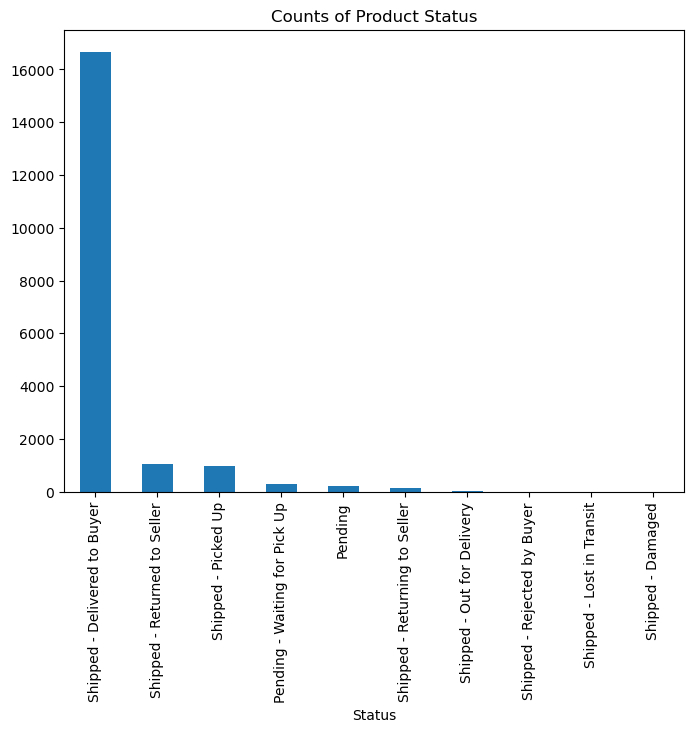

*****************************************************************************************************************************
				**************ANALYSIS***************

~~ This Bar graph is showing the distribution of product Status and observe that most of products shipped which is Delivered to Buyer.
*****************************************************************************************************************************


In [15]:
# Display the Product Status using Bars.

Product_status = df["Status"].value_counts()
print(df["Status"].value_counts())

plt.figure(figsize=(8, 6))
Product_status.plot(kind='bar')
plt.title('Counts of Product Status')
plt.xlabel('Status')
plt.xticks(rotation=90)
plt.show()

print(("*")*125)
print("\t\t\t\t**************ANALYSIS***************\n\n~~ This Bar graph is showing the distribution of product Status and observe that most of products shipped which is Delivered to Buyer.")
print(("*")*125)

Shipped      18879
Unshipped      500
Name: Courier Status, dtype: int64
*****************************************************************************************************************************
						**************ANALYSIS***************

~~  This Pie chart represents that Courior Status of the Products where we see shipped Products is more than the Unshipped.
*****************************************************************************************************************************


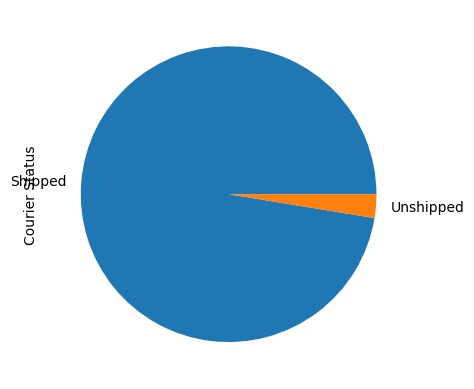

In [16]:
#Display how many Products Shipped or Unshipped.

Courior_Status = df["Courier Status"].value_counts()
print(Courior_Status)

Courior_Status.plot(kind='pie')

print(("*")*125)
print("\t\t\t\t\t\t**************ANALYSIS***************\n\n~~  This Pie chart represents that Courior Status of the Products where we see shipped Products is more than the Unshipped.") 
print(("*")*125)

In [17]:
# Display the records of the Category 'Saree' which is Fulfil by 'Merchant'.

df[["Date","ship-city","ship-state","Amount","Category"]].loc[(df["Category"]=='Saree') & (df["Fulfilment"]=='Merchant')]

,Date,ship-city,ship-state,Amount,Category
56059,05-26-22,AHMADNAGAR,MAHARASHTRA,756.0,Saree
63387,05-20-22,CUTTACK,ODISHA,885.0,Saree
70384,05-14-22,NASHIK,MAHARASHTRA,1770.0,Saree
77582,05-08-2022,JHANSI,UTTAR PRADESH,554.0,Saree
79684,05-07-2022,HYDERABAD,TELANGANA,832.0,Saree
112457,06-12-2022,ALMORA,UTTARAKHAND,756.0,Saree
115435,06-10-2022,NORTH 24 PARGANAS,WEST BENGAL,998.0,Saree
122363,06-05-2022,KANPUR,UTTAR PRADESH,948.0,Saree
127005,06-02-2022,KALYAN,MAHARASHTRA,686.0,Saree
127410,06-01-2022,Cuttack,ODISHA,737.0,Saree


In [18]:
# Display the details of Western dress shipped by Mumbai city and Amount should be less than 500.

df[["Date","ship-city","Amount","Category"]].loc[(df["Category"]=='Western Dress') & (df["Amount"]<500) & (df["ship-city"]=='MUMBAI')]

,Date,ship-city,Amount,Category
63409,05-20-22,MUMBAI,443.0,Western Dress
68272,05-16-22,MUMBAI,443.0,Western Dress
70484,05-14-22,MUMBAI,443.0,Western Dress
70895,05-14-22,MUMBAI,475.0,Western Dress
71136,05-14-22,MUMBAI,443.0,Western Dress
72409,05-13-22,MUMBAI,443.0,Western Dress
72746,05-12-2022,MUMBAI,443.0,Western Dress
72922,05-12-2022,MUMBAI,443.0,Western Dress
77535,05-08-2022,MUMBAI,430.0,Western Dress
94111,06-27-22,MUMBAI,443.0,Western Dress


In [19]:
# Show the categorywise distribution of Products using appropriate graph.  

df["Category"].value_counts()

Set              7004
kurta            6136
Western Dress    4439
Top              1427
Ethnic Dress      156
Bottom            123
Blouse             83
Saree              11
Name: Category, dtype: int64

*****************************************************************************************************************************
						**************ANALYSIS***************

~~  Here, we observe the distribution of products across different categories. It is evident that the most ordered products, in decreasing order are Sets, Kurtas, Western dresses and Tops, etc.
*****************************************************************************************************************************


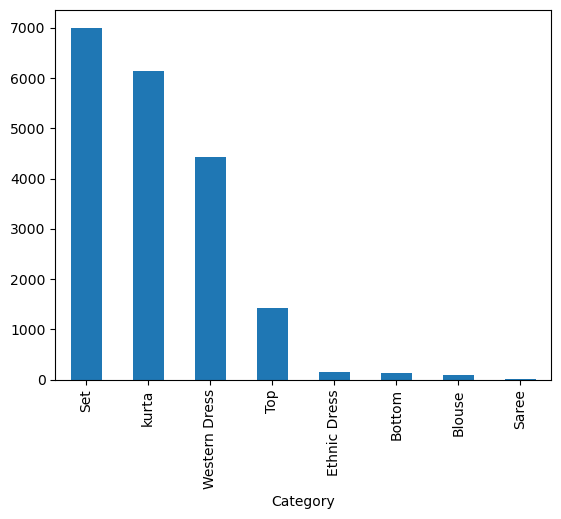

In [20]:
df["Category"].value_counts().plot(kind='bar')
plt.xlabel('Category')

print(("*")*125)
print("\t\t\t\t\t\t**************ANALYSIS***************\n\n~~  Here, we observe the distribution of products across different categories. It is evident that the most ordered products, in decreasing order are Sets, Kurtas, Western dresses and Tops, etc.") 
print(("*")*125)

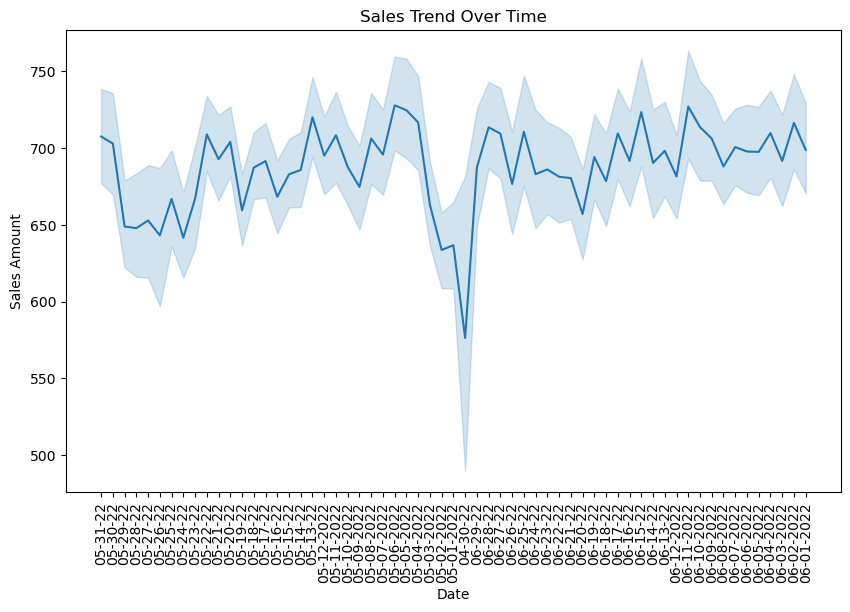

*****************************************************************************************************************************
						**************ANALYSIS***************

~~  The line chart illustrates the sales trend over time, focusing on 1st 20 records. It provides a visual representation of how sales amounts have varied over the observed period, aiding in understanding the overall sales trajectory.
*****************************************************************************************************************************


In [21]:
# Sales trends using Line Charts.

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date'[0:20], y='Amount'[0:20], data=df)
plt.title('Sales Trend Over Time')
plt.ylabel('Sales Amount')
plt.xticks(rotation=90)
plt.show()

print(("*")*125)
print("\t\t\t\t\t\t**************ANALYSIS***************\n\n~~  The line chart illustrates the sales trend over time, focusing on 1st 20 records. It provides a visual representation of how sales amounts have varied over the observed period, aiding in understanding the overall sales trajectory.") 
print(("*")*125)

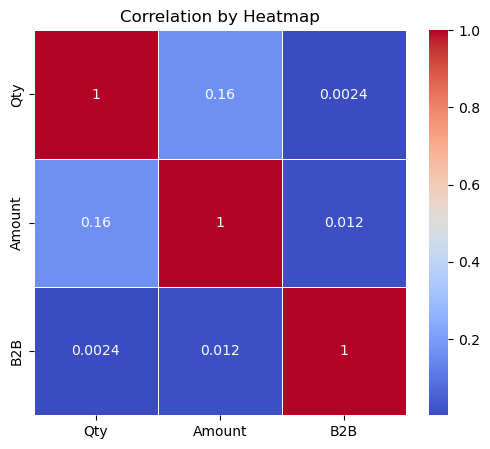

*****************************************************************************************************************************
						**************ANALYSIS***************

~~  The heatmap values indicate a positive correlation between the variables. This suggests that as one variable increases, the other variable tends to increase as well.
*****************************************************************************************************************************


In [22]:
# Show graphical representation to Identify Correlations.

plt.figure(figsize=(6, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation by Heatmap')
plt.show()

print(("*")*125)
print("\t\t\t\t\t\t**************ANALYSIS***************\n\n~~  The heatmap values indicate a positive correlation between the variables. This suggests that as one variable increases, the other variable tends to increase as well.") 
print(("*")*125)

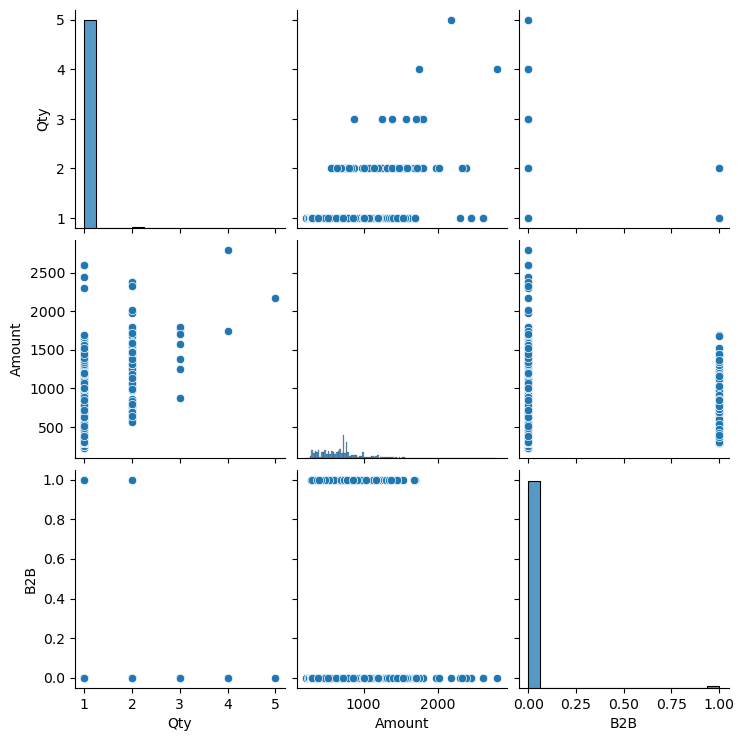

*****************************************************************************************************************************
						**************ANALYSIS***************

~~  This Visualization shows that Collection of Charts which represents the relation between Variables of data, Sales, trends and patterns as well.
*****************************************************************************************************************************


In [23]:
# Display the Collection of Pattern, Trends and reletion of Sales data.
 
sns.pairplot(df)
plt.show()

print(("*")*125)
print("\t\t\t\t\t\t**************ANALYSIS***************\n\n~~  This Visualization shows that Collection of Charts which represents the relation between Variables of data, Sales, trends and patterns as well.") 
print(("*")*125)